In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import seaborn as sns

In [ ]:
# Load CSV file
df = pd.read_csv("/Dataset .csv", encoding='utf-8')

# Remove rows with missing coordinates
df = df.dropna(subset=["Latitude", "Longitude"])

print("Dataset Shape after cleaning:", df.shape)



Dataset Shape after cleaning: (9551, 21)


In [ ]:
# Remove unwanted spaces in column names
df.columns = df.columns.str.strip()

# Define important columns (update if names differ in your CSV)
city_col = "City"
lat_col = "Latitude"
lon_col = "Longitude"
rating_col = "Aggregate rating"
cuisine_col = "Cuisines"
price_col = "Average Cost for two"

# Remove rows with missing coordinates
df = df.dropna(subset=[lat_col, lon_col])

# Drop duplicates if any
df = df.drop_duplicates()

print("Cleaned Shape:", df.shape)


Cleaned Shape: (9551, 21)


In [ ]:
# Use an online GeoJSON for the world map
world = gpd.read_file("https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson")


In [ ]:
# Convert to geospatial points
geometry = [Point(xy) for xy in zip(df["Longitude"], df["Latitude"])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")


/tmp/ipython-input-904905604.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.values, y=city_counts.index, palette="viridis")


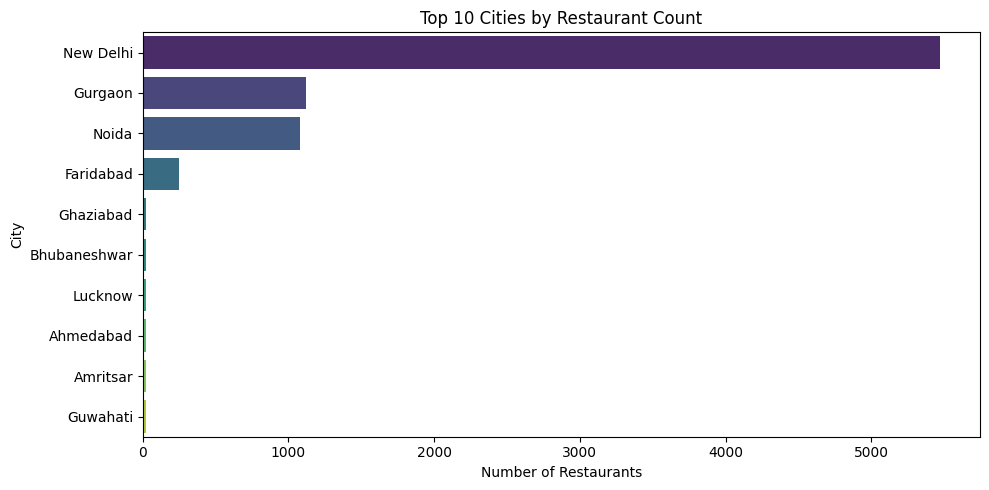

In [ ]:
city_counts = df[city_col].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=city_counts.values, y=city_counts.index, palette="viridis")
plt.title("Top 10 Cities by Restaurant Count")
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.tight_layout()
plt.show()


/tmp/ipython-input-275809171.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating.values, y=avg_rating.index, palette="coolwarm")


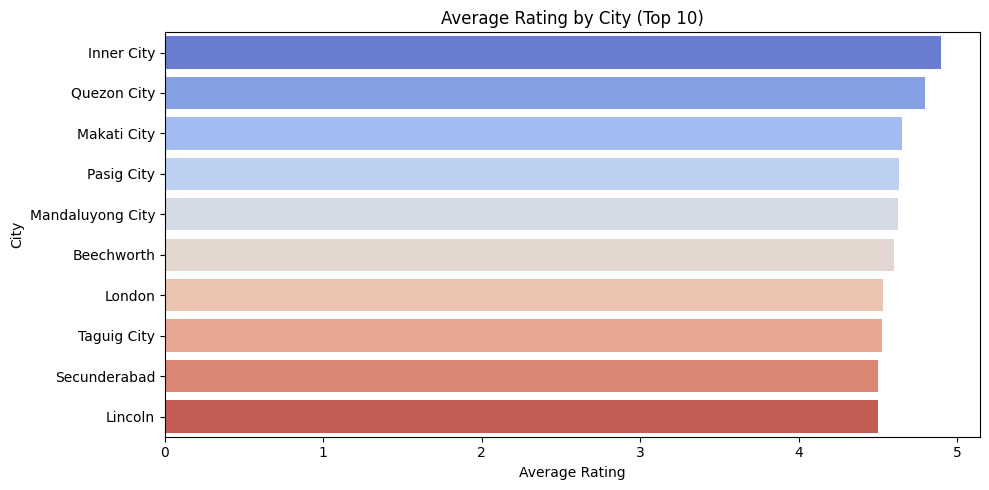

In [ ]:
avg_rating = df.groupby(city_col)[rating_col].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=avg_rating.values, y=avg_rating.index, palette="coolwarm")
plt.title("Average Rating by City (Top 10)")
plt.xlabel("Average Rating")
plt.ylabel("City")
plt.tight_layout()
plt.show()


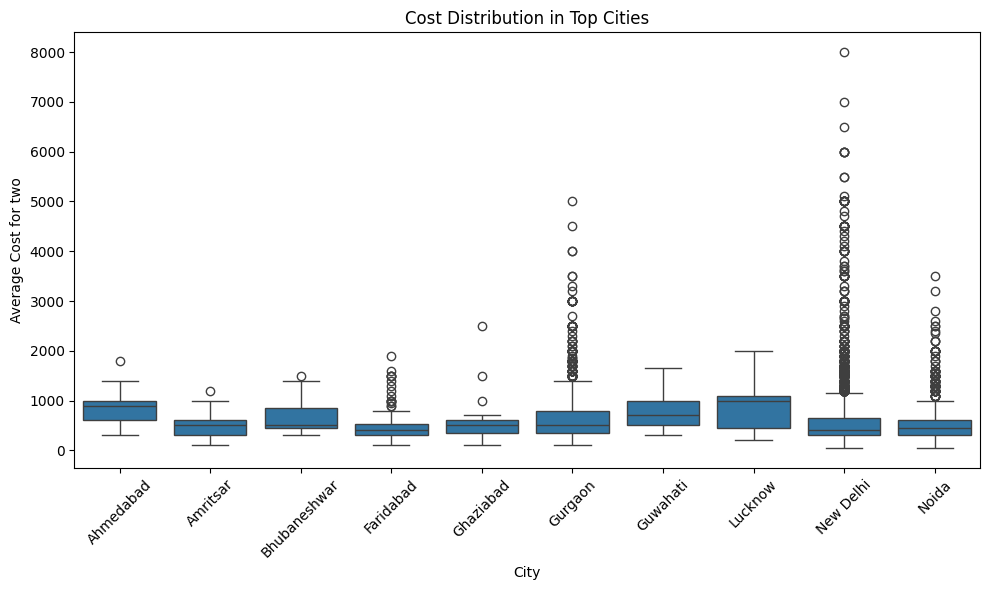

In [ ]:
top_cities = city_counts.index
df_top_cities = df[df[city_col].isin(top_cities)]

plt.figure(figsize=(10,6))
sns.boxplot(x=city_col, y=price_col, data=df_top_cities)
plt.title("Cost Distribution in Top Cities")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-1974612777.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisine_counts.values, y=cuisine_counts.index, palette="magma")


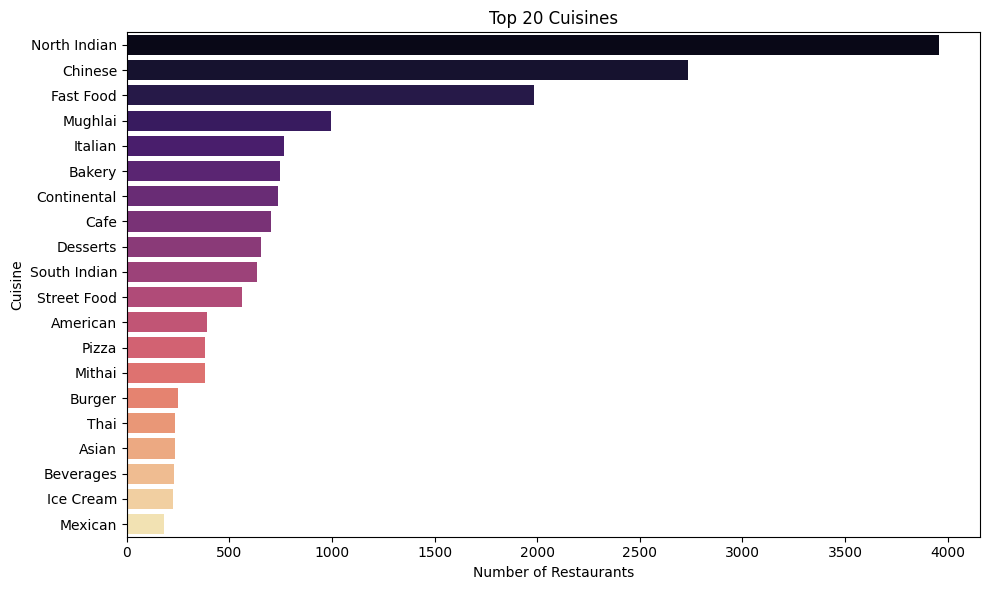

In [ ]:
from collections import Counter

cuisine_list = []
for c in df[cuisine_col].dropna():
    cuisine_list.extend([x.strip() for x in c.split(",")])

cuisine_counts = pd.Series(Counter(cuisine_list)).sort_values(ascending=False).head(20)

plt.figure(figsize=(10,6))
sns.barplot(x=cuisine_counts.values, y=cuisine_counts.index, palette="magma")
plt.title("Top 20 Cuisines")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine")
plt.tight_layout()
plt.show()


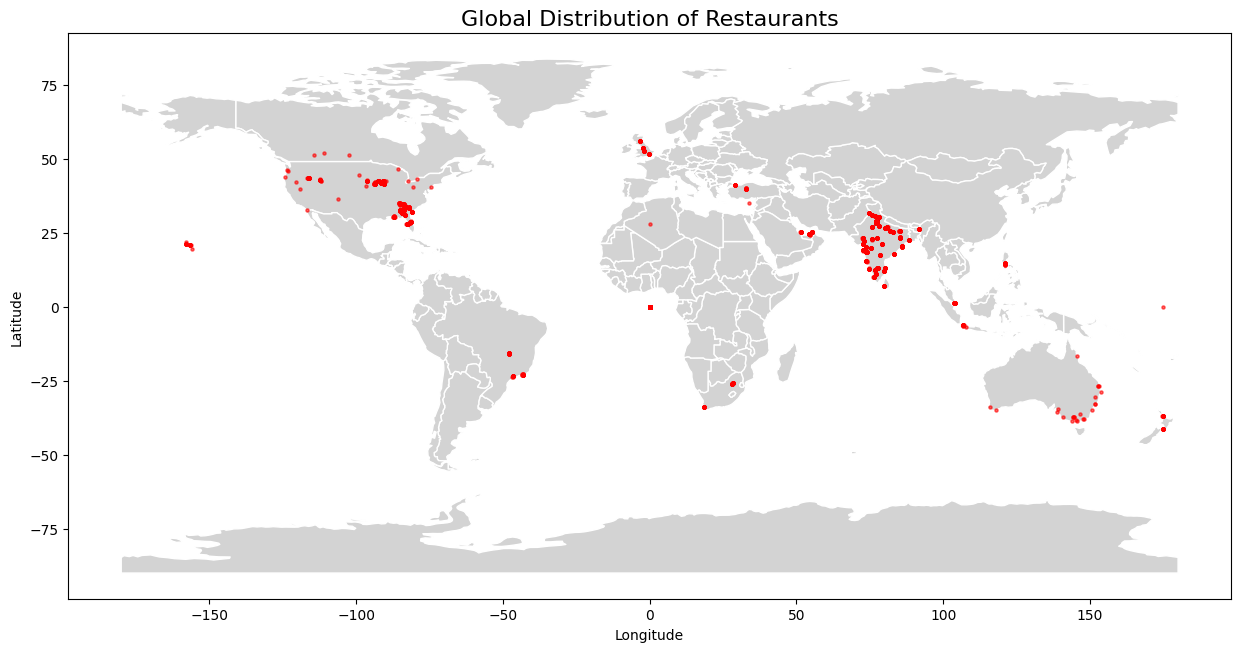

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

# Plot base world map
world.plot(ax=ax, color='lightgrey', edgecolor='white')

# Plot restaurant locations
gdf.plot(ax=ax, markersize=5, alpha=0.6, color='red')

plt.title("Global Distribution of Restaurants", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [ ]:

high_rating_threshold = 4.5
city_stats = df.groupby("City").agg(
    total_restaurants=("Restaurant ID", "count"),
    high_rated=("Aggregate rating", lambda x: (x >= high_rating_threshold).sum())
).reset_index()

# Calculate percentage
city_stats["high_rating_percentage"] = (city_stats["high_rated"] / city_stats["total_restaurants"]) * 100

city_stats = city_stats[city_stats["total_restaurants"] >= 20]

# Sort by percentage
city_stats = city_stats.sort_values("high_rating_percentage", ascending=False)


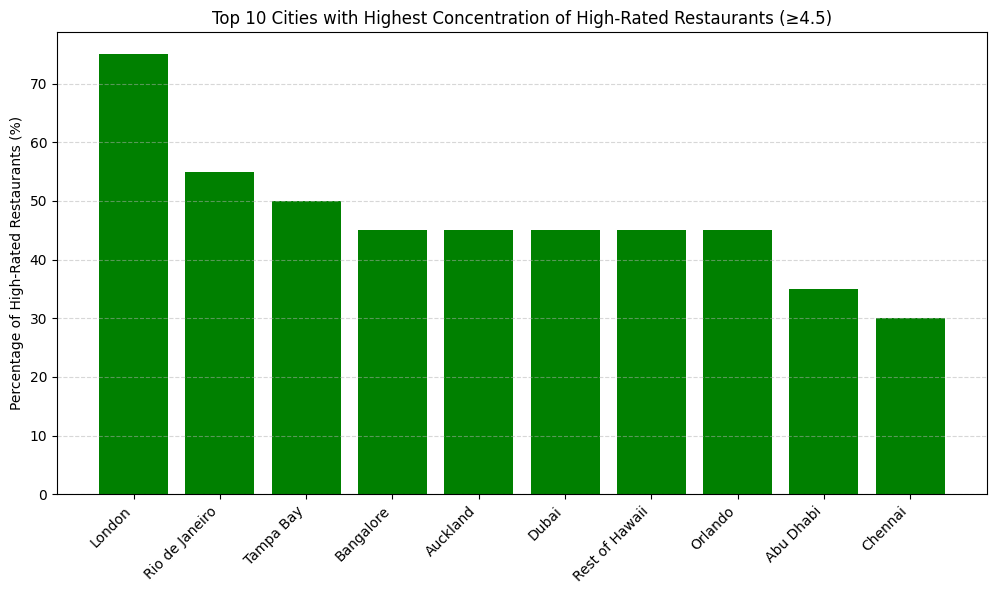

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(city_stats["City"].head(10), city_stats["high_rating_percentage"].head(10), color='green')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Percentage of High-Rated Restaurants (%)")
plt.title("Top 10 Cities with Highest Concentration of High-Rated Restaurants (≥4.5)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()
